# WGU D208 TASK 1 REV 6

<div class="title_page">
    Multiple Regression Using Churn Data<br><br>

    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D208: Predictive Modeling<br>
    Dr. Keiona Middleton<br><br>

    September 12, 2021<br>
</div>

<b>Abstract</b>. Complete multiple regression analysis on provided churn data set. Additional data preparation as necessary. Provide initial model including all of the available numeric and categorical data. Make judgement to refine model. Task requirements include: research question, method justification, data preparation, model comparison and analysis, data summary and implications. The task submission will include this paper, a copy of the Python notebook with code, output and markup, and a video walk-through. Key words: Churn. Regression. Linear Regression. Multiple Regression. Primary data set: clean_churn.csv, the initial set has 10,000 records with 50 attributes. 

## A1. Research Question.

Predict customer’s monthly payment (MonthlyCharge) with high degree of accuracy (>= 95%) based minimum set of predictor variables.

## A2. Goals.

Accomplish the modeling analysis by completing the following:
<ul class="a">
    <li>Refine initial data set by removing insignificant data (e.g. identification variables, some demographic data, etc.)
    <li>Prepare data by converting categorical data to dummy data.
    <li>Prepare data for modeling by standardizing numeric data.
    <li>Eliminate predictor variables with high p-values.
    <li>Eliminate predictor variables with high degree of multicollinearity.
    <li>Create initial model using all the data.
    <li>Refine model using a reduced set of the data.
</ul>


## B1. Assumptions

The analysis is based on the following assumptions:
<ul class="a">
    <li><b>Linear Relationship</b>. Linear relationship between dependent and independent variables.
    <li><b>Multivariate Normality</b>. Residuals are normally distributed.
    <li><b>Multicollinearity</b>. The independent or predictor variables are not highly correlated with each other.
</ul>


In [1386]:
# import standard libraries
import os
import sys
import datetime

# import math libraries
import numpy as np
import pandas as pd 
import scipy.stats as stats

# import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import analysis libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA

# regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import helper libraries
from helpers.strings import *
#from helpers.plots import *

In [1387]:
# constants
print(section('Global Constants'))
COURSE = 'd208'
print('COURSE: {}'.format(COURSE))



####################################
	GLOBAL CONSTANTS
####################################
COURSE: d208


In [1388]:
# helper functions
def vdir():
    '''https://stackoverflow.com/questions/21542753/dir-without-built-in-methods'''
    return [x for x in dir() if not x.startswith('__')]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def custom_corr_matrix(data, title):
    plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=data.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(X))
    plt.savefig('output/' + COURSE + '/matrix_' + title + '.png') 

In [1389]:
# print out current imports
#lst = dir()
#[k for k in lst if '_' not in k]

## B2. Benefits of Using Python

The analysis is completed within the Python/VS Code environment. Within the project, a virtual environment is setup to include the packages and code unique to this assignment:<br>
<ul class="a">
    <li>Python 3.9.7
    <li>VS Code 1.60.0
</ul>

Python has the following benefits:
<ul class="a">
    <li>Ease of use
    <li>Availability of required statistical and modeling packages
    <li>User friendly Jupyter notebook allows segmented code execution and ability to include additional markup with the code.
    <li>Able to use custom .css styles to format html output
</ul>

In [1390]:
# show python environment
print(section('Python Environment'))
print(sys.version)
print(sys.executable)



######################################
	PYTHON ENVIRONMENT
######################################
3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
p:\code_wgu\5\v\Scripts\python.exe


The following is a list of all installed packages, used [>pip list] from terminal:<br>
<b>Package           Version</b><br>
======================<br>
backcall          0.2.0<br>
colorama          0.4.4<br>
cycler            0.10.0<br>
debugpy           1.4.3<br>
decorator         5.1.0<br>
entrypoints       0.3<br>
ipykernel         6.4.1<br>
ipython           7.27.0<br>
ipython-genutils  0.2.0<br>
jedi              0.18.0<br>
joblib            1.0.1<br>
jupyter-client    7.0.2<br>
jupyter-core      4.7.1<br>
kiwisolver        1.3.2<br>
matplotlib        3.4.3<br>
matplotlib-inline 0.1.3<br>
nest-asyncio      1.5.1<br>
numpy             1.21.2<br>
pandas            1.3.2<br>
parso             0.8.2<br>
pickleshare       0.7.5<br>
Pillow            8.3.2<br>
pip               21.2.4<br>
prompt-toolkit    3.0.20<br>
Pygments          2.10.0<br>
pyparsing         2.4.7<br>
python-dateutil   2.8.2<br>
pytz              2021.1<br>
pywin32           301<br>
pyzmq             22.2.1<br>
scikit-learn      0.24.2<br>
scipy             1.7.1<br>
seaborn           0.11.2<br>
setuptools        56.0.0<br>
six               1.16.0<br>
sklearn           0.0<br>
threadpoolctl     2.2.0<br>
tornado           6.1<br>
traitlets         5.1.0<br>
wcwidth           0.2.5<br>

In [1391]:
# Styling notebook
print(section('Style Notebook'))
from IPython.core.display import HTML
def css_styling(f):
    print("./styles/" + f)
    styles = open("./styles/" + f, "r").read()
    print("Incorporate css styles into notebook (STO21).")
    return HTML(styles)
css_styling('custom.css')



##################################
	STYLE NOTEBOOK
##################################
./styles/custom.css
Incorporate css styles into notebook (STO21).


## B3. Why Multiple Regression is Appropriate

Multiple regression is “the most common” tool for regression analysis. “Multiple regress will allow researcher to asses strength of the relationship between dependent and several predictor variables as well as the importance of each predictor to the relationship.” (Petchko, 2018)

## C1. Describe Data Preparation

The analysis will include the following data preparation tasks:
<ul class="a">
    <li>Load data from .csv file
    <li>Remove insignificant data
    <li>Create a list of the target data
    <li>Create a new data frame of all predictor variables
    <li>Convert categorical data to dummy numerical variables
    <li>Use traditional statistics to describe numerical data
    <li>Create univariate and bivariate visualizations of the data
</ul>


## C2. Discuss Summary Statistics

The target, dependent variable. For this task, <b>MonthlyCharge</b> is the target variable. It is numeric data. The purpose of this regression model is to find the best set of predictor variables that can be used to predict a customer’s MonthlyCharge to a high degree of accuracy. 

In [1392]:
# read csv file
print(section('Create Dataframe (df)'))
df = pd.read_csv(os.path.join('data','churn_clean.csv'))
print(df.columns.to_series().groupby(df.dtypes).groups)
print(df.shape)



#########################################
	CREATE DATAFRAME (DF)
#########################################
{int64: ['CaseOrder', 'Zip', 'Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], float64: ['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}
(10000, 50)


In [1393]:
# drop unwanted data
print(section('Drop Unwanted Data'))
to_drop = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
df.drop(columns = to_drop, inplace = True)
print(to_drop)




######################################
	DROP UNWANTED DATA
######################################
['City', 'County', 'Zip', 'Job', 'TimeZone', 'State', 'Churn', 'Lat', 'Lng', 'UID', 'Customer_id', 'Interaction', 'CaseOrder', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Insignificant data to be removed:<br>
<ul class="a">
    <li><b>CaseOrder</b>: A placeholder variable to preserve the original order of the raw data file
    <li><b>Customer_id</b>: Unique customer ID Interaction, UID: Unique IDs related to customer transactions, technical support, and sign ups
    <li><b>City</b>: Customer city of residence as listed on the billing statement
    <li><b>State</b>: Customer state of residence as listed on the billing statement
    <li><b>County</b>: Customer county of residence as listed on the billing statement
    <li><b>Zip</b>: Customer zip c ode of residence as listed on the billing statement
    <li><b>Lat, Lng</b>: GPS coordinates of customer residence as listed on the billing statement
    <li><b>Population</b>: Population within a mile radius of customer, based on census data
    <li><b>TimeZone</b>: Time zone of customer residence based on customer’s sign up information
    <li><b>Job</b>: Job of the customer (or invoiced person) as reported in sign up information
</ul>

In [1394]:
# move target to front
print(section('Move Target to Front'))
target = 'MonthlyCharge'
df = df[ [target] + [ col for col in df.columns if col != target ] ]
df.columns



########################################
	MOVE TARGET TO FRONT
########################################


Index(['MonthlyCharge', 'Population', 'Area', 'Children', 'Age', 'Income',
       'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'Bandwidth_GB_Year'],
      dtype='object')

In [1395]:
# show column names grouped by dtype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['MonthlyCharge', 'Income', 'Outage_sec_perweek', 'Tenure', 'Bandwidth_GB_Year'], object: ['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

In [1396]:
# prepare numeric data
print(section('Prepare Numeric Data'))
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = (df[num_cols] - df[num_cols].mean())/df[num_cols].std()
print(num_cols)



########################################
	PREPARE NUMERIC DATA
########################################
Index(['MonthlyCharge', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'Bandwidth_GB_Year'],
      dtype='object')


In [1397]:
# prepare categorical data
print(section('Prepare Categorical Data'))
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)



############################################
	PREPARE CATEGORICAL DATA
############################################
Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [1398]:
# describe categorical data
print(section('Categorical Data before Conversion'))



######################################################
	CATEGORICAL DATA BEFORE CONVERSION
######################################################


Categorical data:<br>
<ul class="a">
    <li><b>Area</b>: Area type (rural, urban, suburban), based on census data
    <li><b>Education</b>: Highest degree earned by customer as reported in sign up information
    <li><b>Employment</b>: Employment status of customer as reported in sign up information
    <li><b>Techie</b>: Whether the customer considers themselves technically inclined (based on customer questionnaire when they signed up for services) (yes, no)
    <li><b>Contract</b>: The contract term of the customer (month to month, one year, two year)
    <li><b>Marital</b>: Marital status of customer as reported in sign up information
    <li><b>Gender</b>: Customer self identification as male, female, or nonbinary
    <li><b>Churn</b>: Whether the customer discontinued service within the last month (yes, no)
    <li><b>Port_modem</b>: Whether the customer h as a portable modem (yes, no)
    <li><b>Tablet</b>: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)
    <li><b>InternetService</b>: Customer’s internet service provider (DSL, fiber optic, None)
    <li><b>Phone</b>: Whether the customer has a phone service (yes, no)
    <li><b>Multiple</b>: Whether the customer has multiple lines (yes, no)
    <li><b>OnlineSecurity</b>: Whether the customer has an online security add on (yes, no)
    <li><b>OnlineBackup</b>: Whether the customer has an online backup add on (yes,
    <li><b>DeviceProtection</b>: Whether the customer has device protection add on (yes, no)
    <li><b>TechSupport</b>: Whether the customer has a technical support add on (yes, no)
    <li><b>StreamingTV</b>: Whether the customer has streaming TV (yes, no)
    <li><b>StreamingMovies</b>: Whether the customer has streaming movies (yes, no)
    <li><b>PaperlessBilling</b>: Whether the customer has paperless billing (yes, no)
    <li><b>PaymentMethod</b>: The customer’s payment method (electronic check, mailed check, bank (automatic bank transfer), credit card (automatic))
</ul>

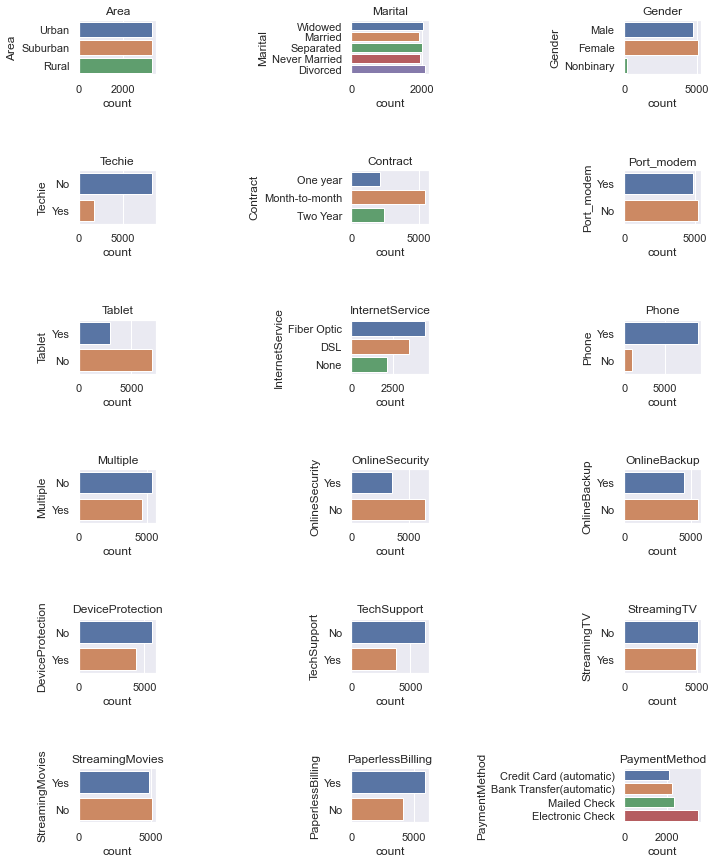

In [1399]:
# plot categorical data - before it gets converted
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=df)
    plt.title(col)
    fig.tight_layout(h_pad=4, w_pad=4)

plt.savefig('countplot_cat_data.png', facecolor='w')

In [1400]:
# convert categorical data
print(section('Convert Categorical Data'))
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.select_dtypes(include="uint8").columns)



############################################
	CONVERT CATEGORICAL DATA
############################################
Index(['Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


In [1401]:
# show final list of all data
print(section('List All Data'))
#print(df.columns.to_series().groupby(df.dtypes).groups)
print(df.info())



#################################
	LIST ALL DATA
#################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharge                          10000 non-null  float64
 1   Population                             10000 non-null  float64
 2   Children                               10000 non-null  float64
 3   Age                                    10000 non-null  float64
 4   Income                                 10000 non-null  float64
 5   Outage_sec_perweek                     10000 non-null  float64
 6   Email                                  10000 non-null  float64
 7   Contacts                               10000 non-null  float64
 8   Yearly_equip_failure                   10000 non-null  float64
 9   Tenure                                 10000 non-null 

In [1402]:
# target data
print(section('Describe Target Data'))



########################################
	DESCRIBE TARGET DATA
########################################


Target numerical data:<br>
<ul class="a">
    <li><b>MonthlyCharge</b>. The amount charged to the customer monthly. This value reflects an average per customer. Here is a plot and description of the MonthlyCharge data:<br>
</ul>

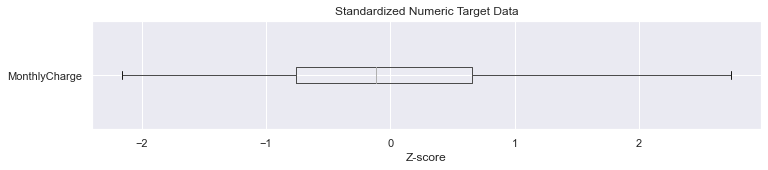

count    10000.000
mean        -0.000
std          1.000
min         -2.157
25%         -0.760
50%         -0.120
75%          0.655
max          2.737
Name: MonthlyCharge, dtype: float64


In [1403]:
# describe standardized target data
plt.figure(figsize=(12, 2))
ax = df.boxplot([target], vert=False)
plt.title('Standardized Numeric Target Data')
plt.xlabel('Z-score')
plt.savefig('box_std_target.png', facecolor='w')
plt.show()
print(df[target].describe().round(3))

In [1404]:
# predictor data
print(section('Describe Numeric Data'))



#########################################
	DESCRIBE NUMERIC DATA
#########################################


Numerical data:<br>
<ul class="a">
    <li><b>Children</b>: Number of children in customer’s household as reported in sign up information
    <li><b>Age</b>: Age of customer as reported in sign up information
    <li><b>Income</b>: Annual income of cu stomer as reported at time of sign up
    <li><b>Outage_sec_perweek</b>: Average number of seconds per week of system outage s in the customer’s neighborhood
    <li><b>Email</b>: Number of emails sent to the customer in the last year (marketing or correspondence)
    <li><b>Contacts</b>: Number of times customer contacted technical support
    <li><b>Yearly_equip_failure</b>: The number of times customer’s equipment failed and had to be reset/replaced in the past year
    <li><b>Tenure</b>: Number of months the customer has stayed with the provider
    <li><b>Bandwidth_GB_Year</b>: The average amount of data used, in GB, in a year by the customer
</ul>

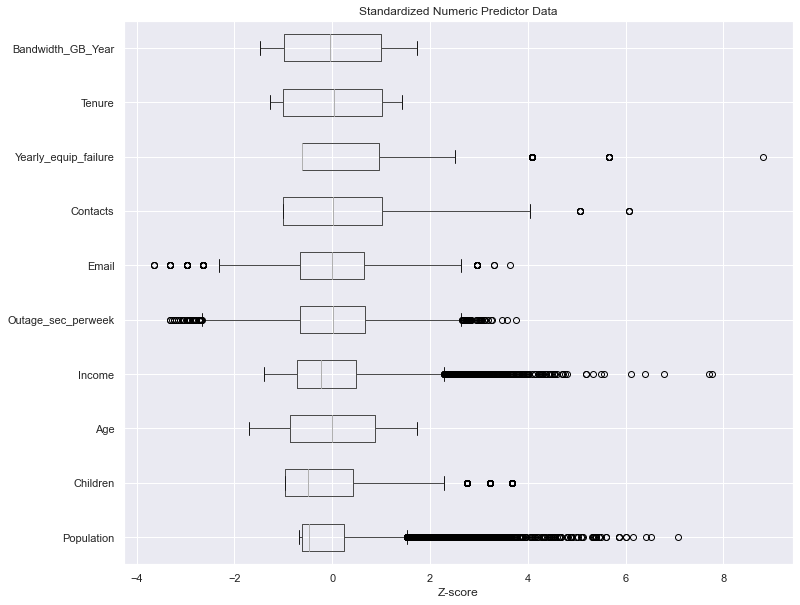

                        count  mean  std    min    25%    50%    75%    max
Population            10000.0  -0.0  1.0 -0.676 -0.625 -0.474  0.236  7.074
Children              10000.0   0.0  1.0 -0.972 -0.972 -0.507  0.425  3.685
Age                   10000.0  -0.0  1.0 -1.695 -0.873 -0.004  0.866  1.735
Income                10000.0   0.0  1.0 -1.399 -0.730 -0.235  0.477  7.769
Outage_sec_perweek    10000.0   0.0  1.0 -3.327 -0.667  0.006  0.661  3.765
Email                 10000.0  -0.0  1.0 -3.641 -0.666 -0.005  0.656  3.630
Contacts              10000.0   0.0  1.0 -1.006 -1.006  0.006  1.018  6.076
Yearly_equip_failure  10000.0   0.0  1.0 -0.626 -0.626 -0.626  0.947  8.809
Tenure                10000.0   0.0  1.0 -1.268 -1.006  0.034  1.019  1.417
Bandwidth_GB_Year     10000.0   0.0  1.0 -1.481 -0.987 -0.052  1.004  1.724


In [1405]:
# describe and boxplot standardized numeric data
plt.figure(figsize=(12, 10))
pred_cols = df[num_cols].columns[1:]
ax = df[pred_cols].boxplot(vert=False)
plt.title('Standardized Numeric Predictor Data')
plt.xlabel('Z-score')
plt.savefig('box_std_num_data.png', facecolor='w')
plt.show()
print(df[pred_cols].describe().round(3).T)


<Figure size 720x1440 with 0 Axes>

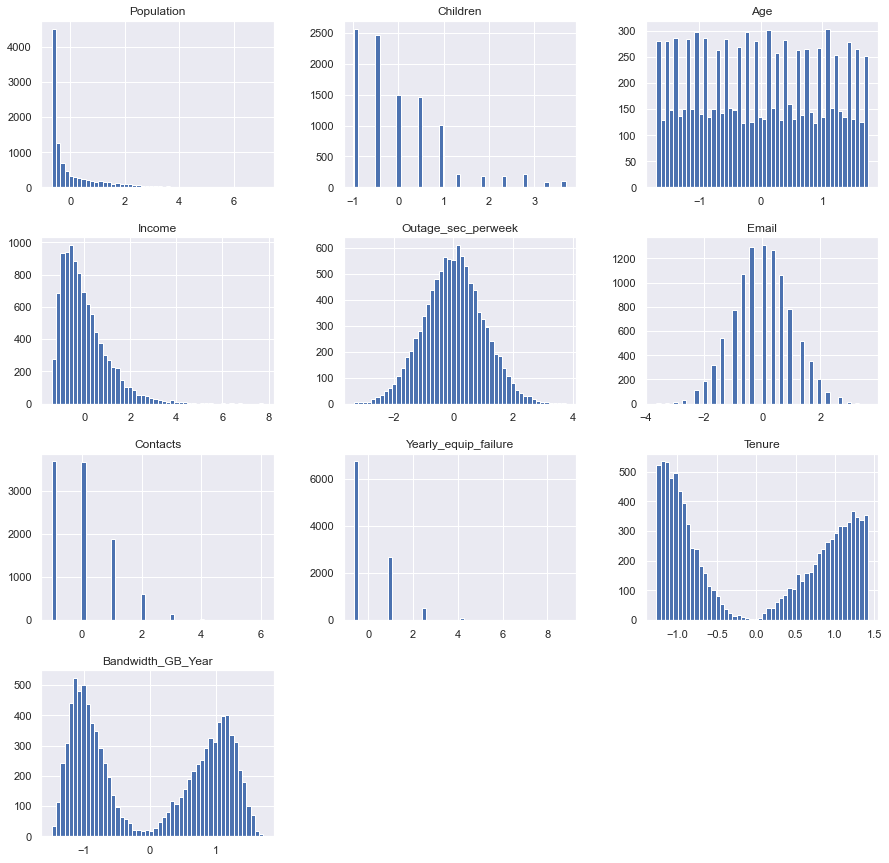

In [1406]:
# histogram plot standardized numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[pred_cols].hist(bins = 50, figsize=(15,15))
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_std_num_data.png', facecolor='w')
plt.show()

Survey data, not to be used for this analysis:<br>
<ul class="a">
    <li><b>Item1</b>: Timely response
    <li><b>Item2</b>: Timely fixes
    <li><b>Item3</b>: Timely replacements
    <li><b>Item4</b>: Reliability
    <li><b>Item5</b>: Options
    <li><b>Item6</b>: Respectful response
    <li><b>Item7</b>: Courteous exchange
    <li><b>Item8</b>: Evidence of active listening
</ul>

$$c = \sqrt{a^2 + b^2}$$

In [1407]:
# example of coded latex math equation
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>



#####################################################
	SCATTER PLOT OF SELECTED FEATURES
#####################################################


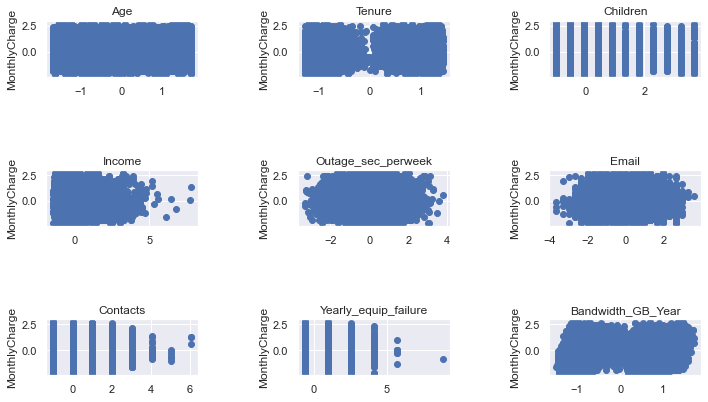

In [1408]:
# scatter plot of selected features
print(section('Scatter Plot of Selected Features'))
fig = plt.figure(figsize=(10, 20))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = df['MonthlyCharge']

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MonthlyCharge')
    fig.tight_layout(h_pad=5, w_pad=5)

## C5. Provide Copy of Data

In [1409]:
# provide copy of data
final_data = 'd208_final_data.csv'
print(section('Copy Final Data'))
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))
print(df.columns.to_series().groupby(df.dtypes).groups)



###################################
	COPY FINAL DATA
###################################
File saved to: d208_final_data.csv
{uint8: ['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'], float64: ['MonthlyCharge', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year']}


In [1410]:
## D1. Initial Model

In [1411]:
# initial model
print(section('Initial Model'))
y = df.loc[ : , df.columns == 'MonthlyCharge']
X = df.loc[ : , df.columns != 'MonthlyCharge']
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2()) # using alternate summary layout



#################################
	INITIAL MODEL
#################################
                             Results: Ordinary least squares
Model:                      OLS                     Adj. R-squared:            0.995      
Dependent Variable:         MonthlyCharge           AIC:                       -25599.6380
Date:                       2021-09-13 06:20        BIC:                       -25325.6451
No. Observations:           10000                   Log-Likelihood:            12838.     
Df Model:                   37                      F-statistic:               5.966e+04  
Df Residuals:               9962                    Prob (F-statistic):        0.00       
R-squared:                  0.996                   Scale:                     0.0045092  
------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
-----------------------------------

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Tenure                                 Bandwidth_GB_Year                 0.991495
Area_Suburban                          Area_Urban                        0.500711
InternetService_Fiber Optic            InternetService_None              0.461753
PaymentMethod_Electronic Check         PaymentMethod_Mailed Check        0.390989
PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check    0.367992
dtype: float64


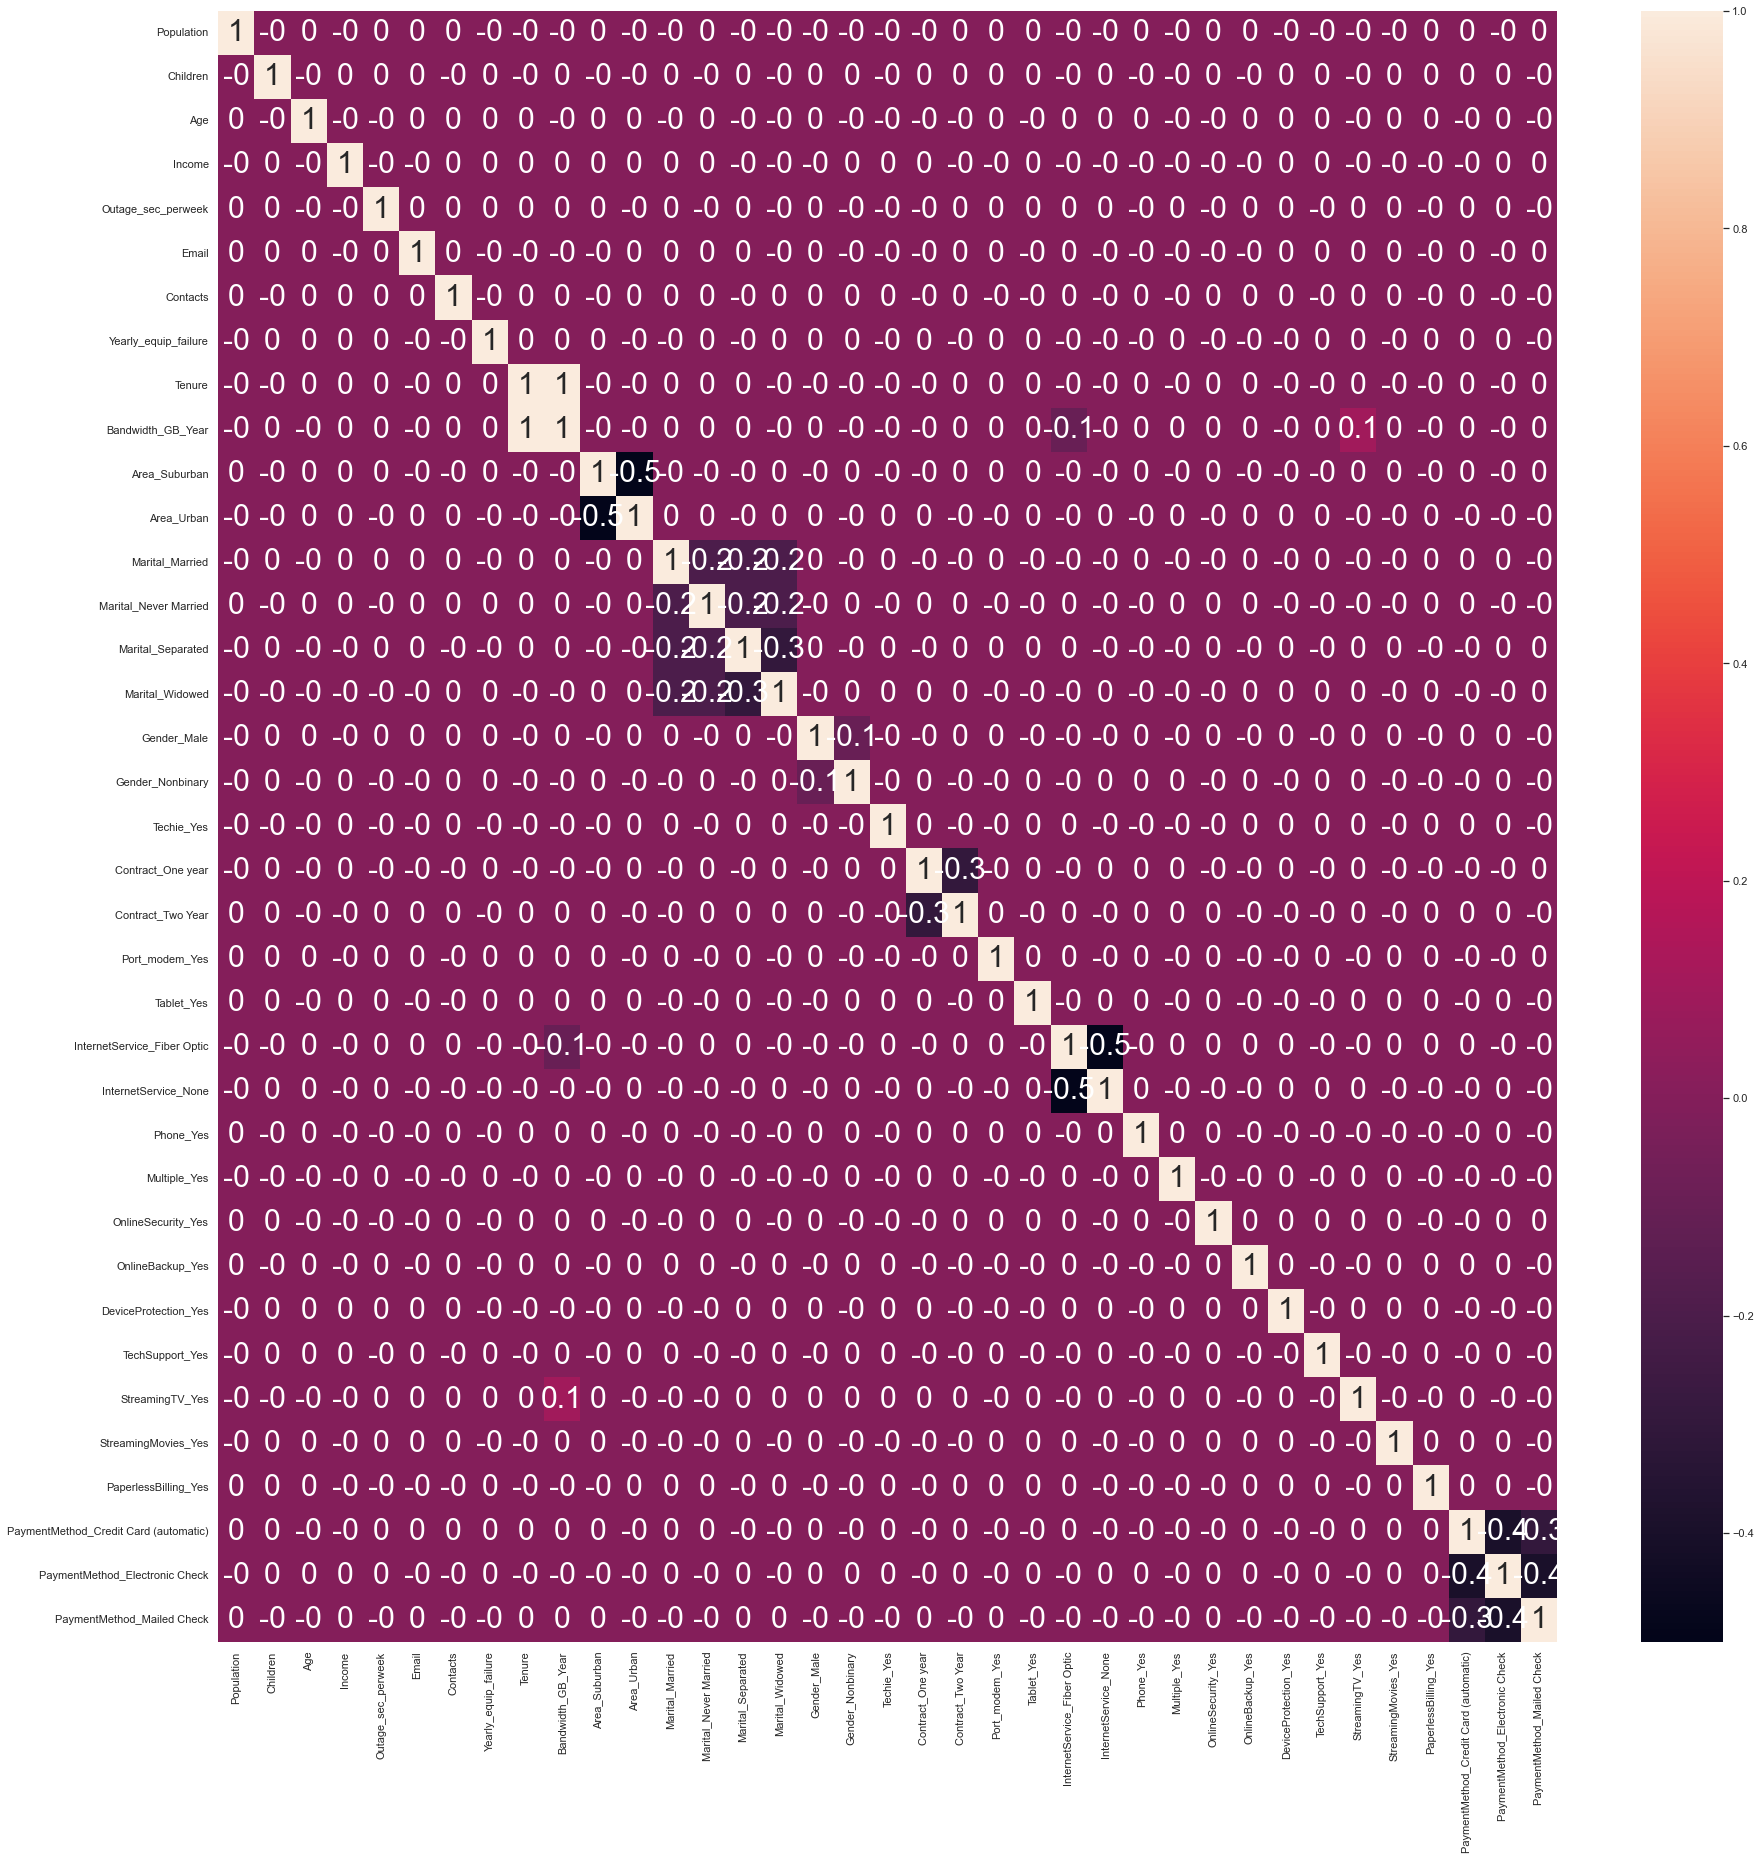

In [1412]:
# create correlation matrix
custom_corr_matrix(X,'Model_1')

In [1413]:
# automatically drop cols if p > 0.05
equation = model_1.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        X.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
X.drop(columns = ['Bandwidth_GB_Year'], inplace = True)
print(X.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'Multiple_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Mailed Check'],
      dtype='object')


p:\code_wgu\5\v\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1414]:
# updated model 
print(section('Updated Model'))
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary2()) # using alternate summary layout



#################################
	UPDATED MODEL
#################################
                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.958     
Dependent Variable:     MonthlyCharge       AIC:                   -3316.0592
Date:                   2021-09-13 06:20    BIC:                   -3193.4834
No. Observations:       10000               Log-Likelihood:        1675.0    
Df Model:               16                  F-statistic:           1.427e+04 
Df Residuals:           9983                Prob (F-statistic):    0.00      
R-squared:              0.958               Scale:                 0.041954  
-----------------------------------------------------------------------------
                             Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                       -2.0638   0.0066 -314.1603 0.0000 -2.0767 -2.0509
Ch

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1415]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.958
Estimate [MonthlyCharge] as y = 
   -2.06 x ( const ) 
   +0.00 x ( Children ) 
   +0.00 x ( Age ) 
   -0.00 x ( Tenure ) 
   +0.00 x ( Area_Suburban ) 
   -0.01 x ( Gender_Male ) 
   -0.02 x ( Gender_Nonbinary ) 
   +0.46 x ( InternetService_Fiber Optic ) 
   -0.30 x ( InternetService_None ) 
   +0.76 x ( Multiple_Yes ) 
   +0.06 x ( OnlineSecurity_Yes ) 
   +0.53 x ( OnlineBackup_Yes ) 
   +0.29 x ( DeviceProtection_Yes ) 
   +0.29 x ( TechSupport_Yes ) 
   +0.98 x ( StreamingTV_Yes ) 
   +1.22 x ( StreamingMovies_Yes ) 
   +0.00 x ( PaymentMethod_Mailed Check ) 


InternetService_Fiber Optic  InternetService_None    0.461753
Gender_Male                  Gender_Nonbinary        0.146092
Children                     Age                     0.029732
Gender_Nonbinary             OnlineBackup_Yes        0.029316
Tenure                       DeviceProtection_Yes    0.028114
dtype: float64


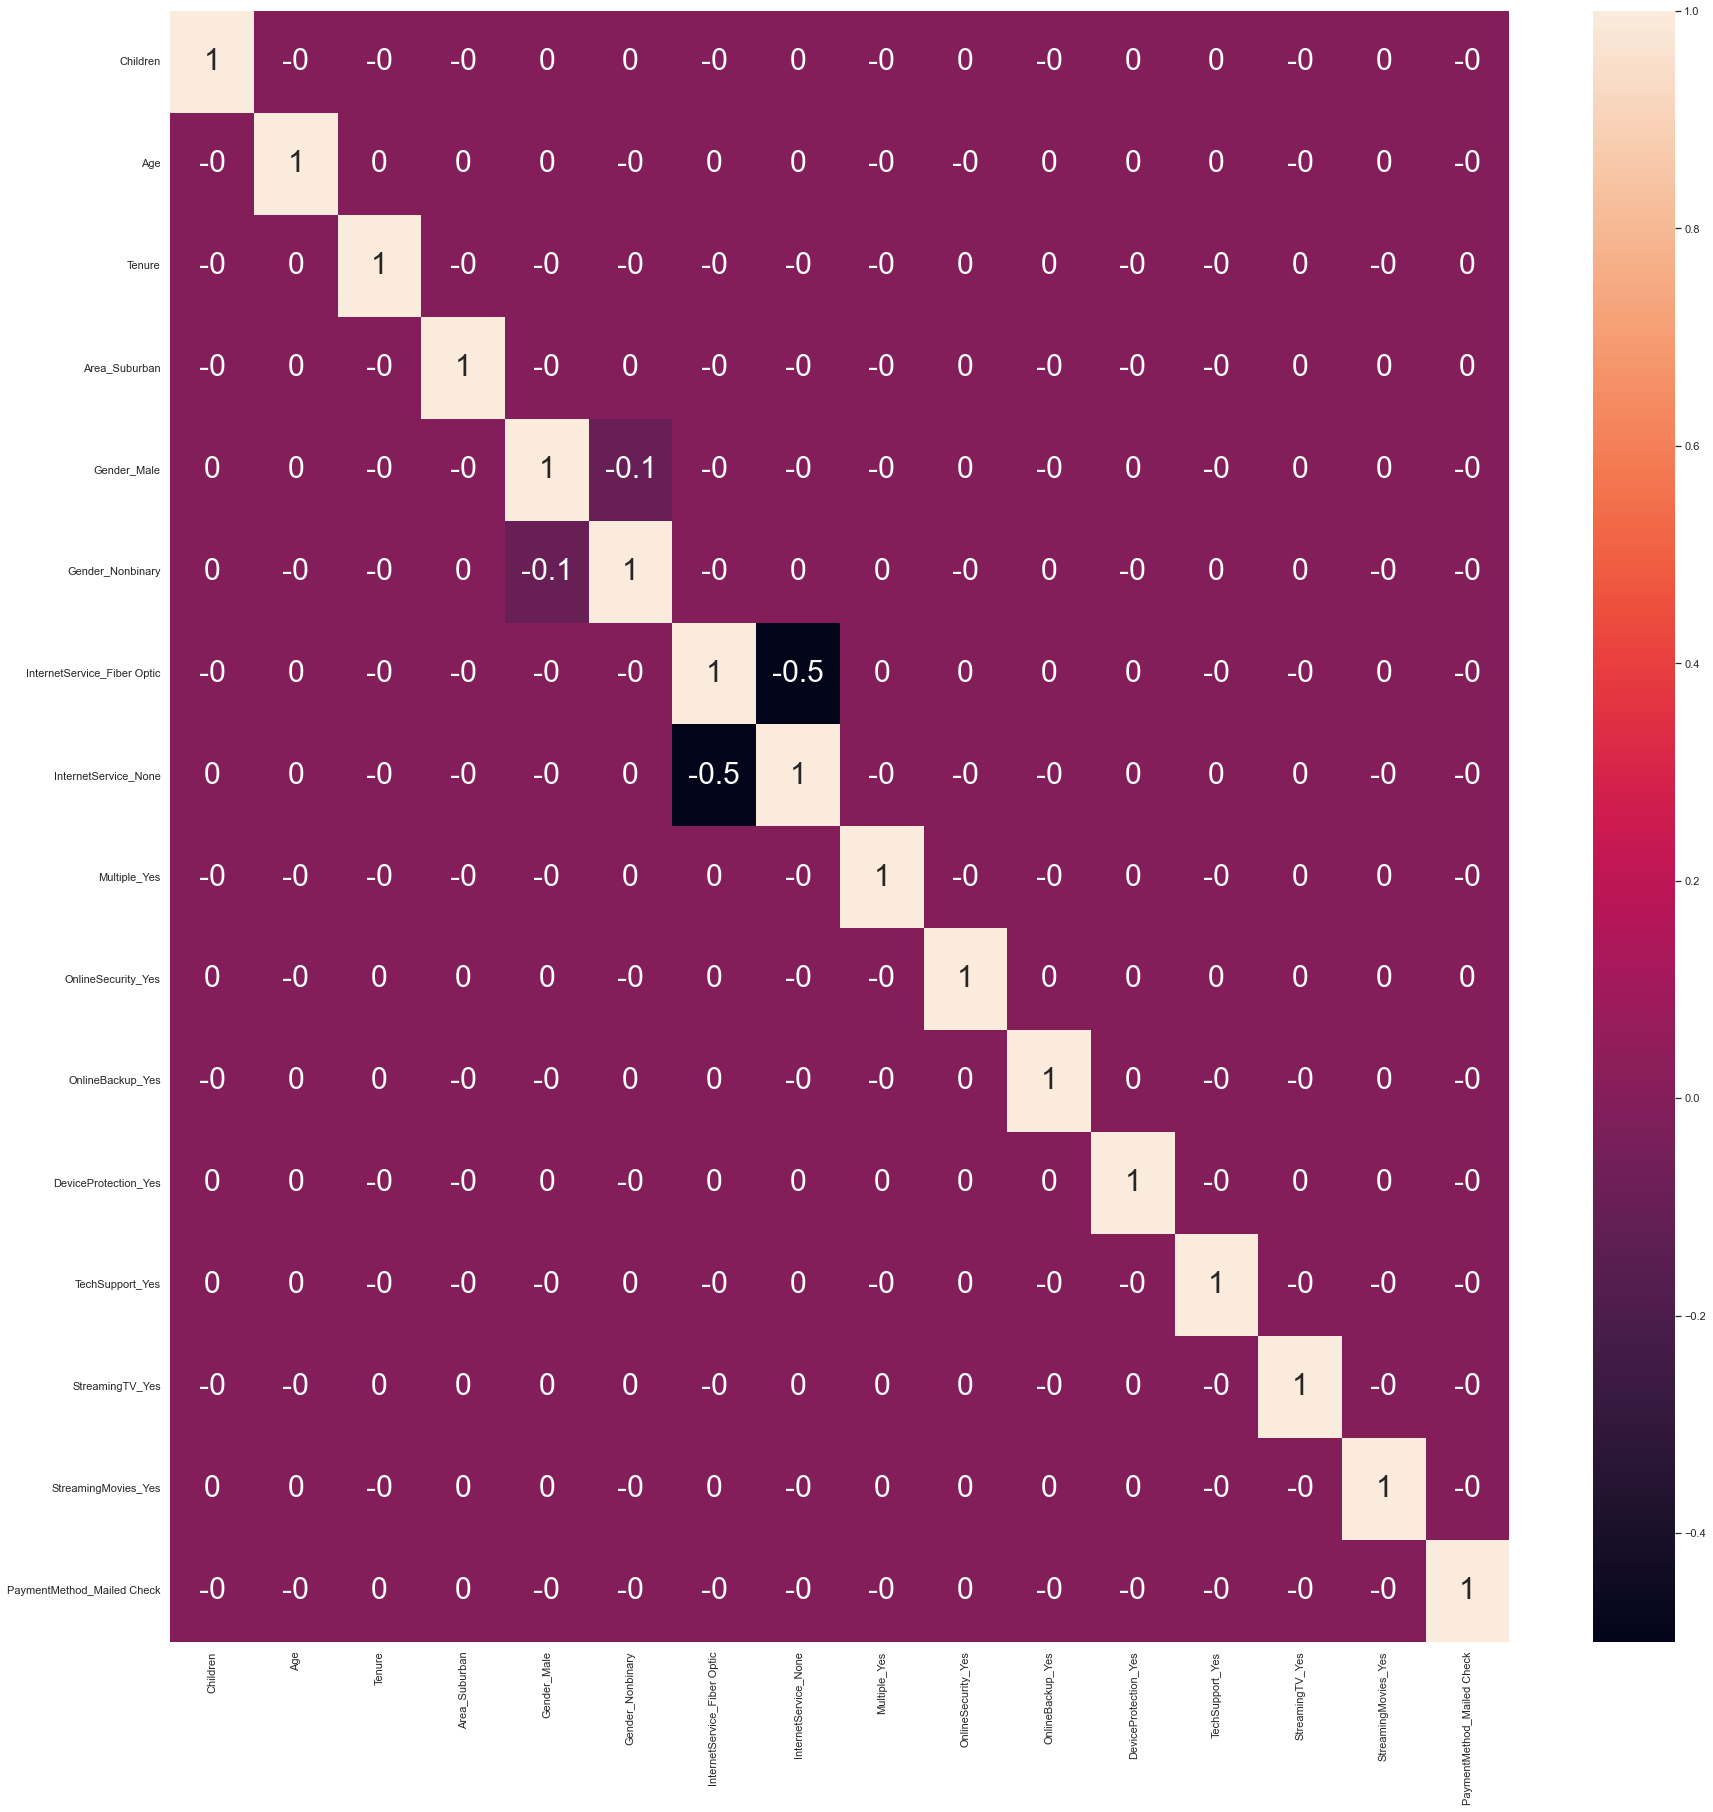

In [1416]:
# create correlation matrix
custom_corr_matrix(X,'Model_2')

In [1417]:
# opted to leave the remaining numerical values 
# even with their high p-values

# drop columns with high multicollinearity
X.drop(columns = ['InternetService_None'], inplace = True)
print(X.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Mailed Check'],
      dtype='object')


p:\code_wgu\5\v\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1418]:
# final model 
print(section('Final Model'))
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary2()) # using alternate summary layout



###############################
	FINAL MODEL
###############################
                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.946    
Dependent Variable:      MonthlyCharge       AIC:                   -825.0717
Date:                    2021-09-13 06:20    BIC:                   -709.7062
No. Observations:        10000               Log-Likelihood:        428.54   
Df Model:                15                  F-statistic:           1.172e+04
Df Residuals:            9984                Prob (F-statistic):    0.00     
R-squared:               0.946               Scale:                 0.053827 
-----------------------------------------------------------------------------
                             Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
const                       -2.1826   0.0070 -311.9355 0.0000 -2.1964 -2.1689
Children

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1419]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   -2.18 x ( const ) 
   -0.00 x ( Children ) 
   +0.00 x ( Age ) 
   +0.00 x ( Tenure ) 
   +0.00 x ( Area_Suburban ) 
   -0.00 x ( Gender_Male ) 
   -0.02 x ( Gender_Nonbinary ) 
   +0.58 x ( InternetService_Fiber Optic ) 
   +0.76 x ( Multiple_Yes ) 
   +0.07 x ( OnlineSecurity_Yes ) 
   +0.53 x ( OnlineBackup_Yes ) 
   +0.29 x ( DeviceProtection_Yes ) 
   +0.29 x ( TechSupport_Yes ) 
   +0.98 x ( StreamingTV_Yes ) 
   +1.22 x ( StreamingMovies_Yes ) 
   +0.00 x ( PaymentMethod_Mailed Check ) 
